In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df1=df

In [8]:
df1=df1.drop(['CustomerID'],axis=1)

In [9]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [10]:
df1['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
df1['Gender']=df1['Gender'].replace(['Male','Female'],[0,1])

In [12]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [13]:
df1.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df1.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [15]:
#now all values are in int data and there are no null values so we can start clustering our data...

In [16]:
df2=df1

In [17]:
#unlike kmean clustering herirarchal clustering dont have any idea about no of clusters in it...heirarchal clustering have unknown no of clusters..

In [18]:
#plotting the data on graph..

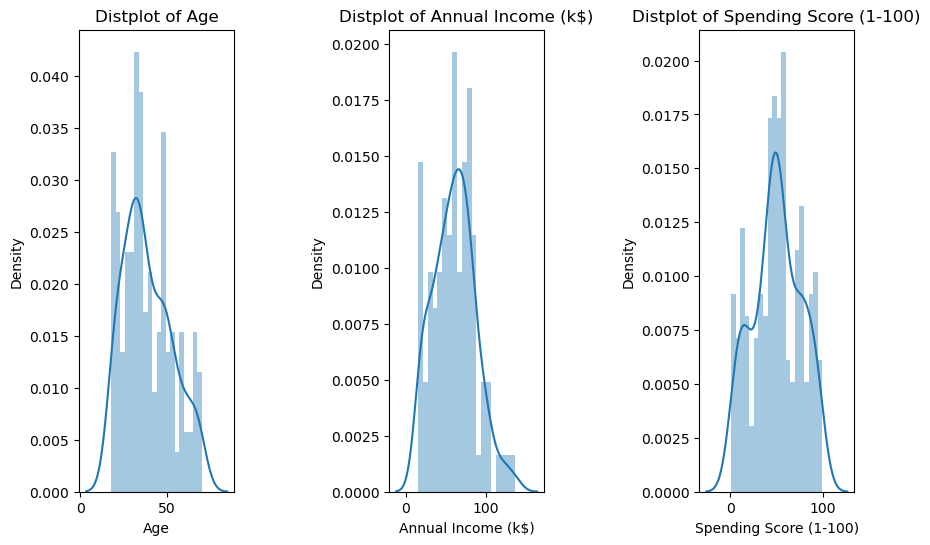

In [20]:
plt.figure(figsize=(10,6))
n=0
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:#gender have value 0 and 1 only  in it so no need to plot....
    n +=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=1,wspace=1)
    sns.distplot(df1[i], bins=20)
    plt.title('Distplot of {}'.format(i))
    
plt.show()
    

In [21]:
#there are actually 2 types of clustering in heirarchal clustering 1) Aggromative and 2)Top-down...

In [23]:
#we will be using Aggromative clustering...we also need to import dendogram a graph that shows clusters...

In [25]:
from sklearn import preprocessing
from scipy.cluster import hierarchy as sch#for heirarchy clustering use scipy.cluster
from sklearn.cluster import AgglomerativeClustering#for aggromative clustering use sklearn.cluster

In [26]:
#plotting dendogram...

Text(0, 0.5, 'Euclidean distance')

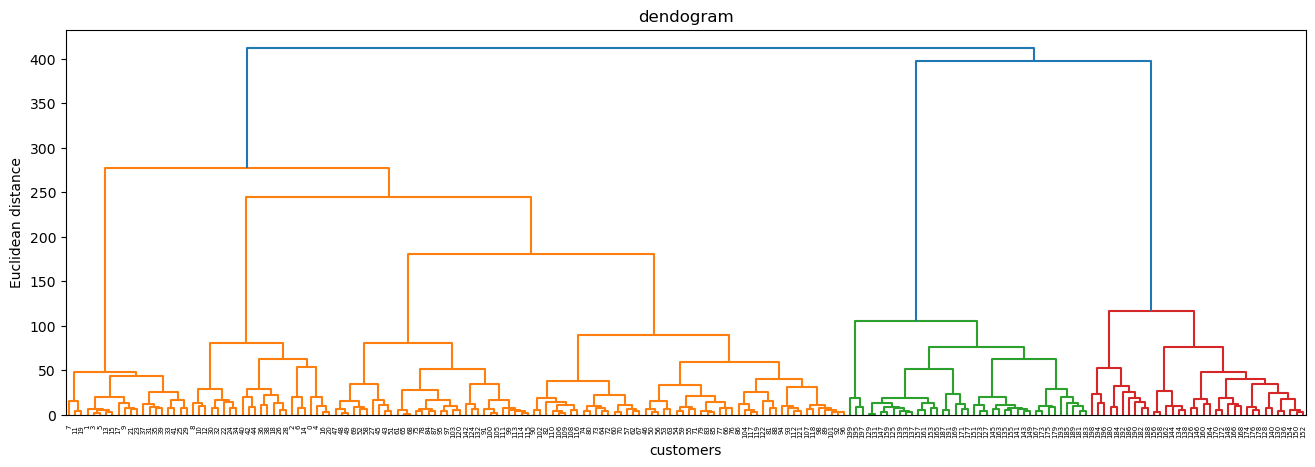

In [27]:
plt.figure(figsize=(16,5))
dendo=sch.dendrogram(sch.linkage(df2, method='ward'))

plt.title("dendogram")
plt.xlabel("customers")
plt.ylabel("Euclidean distance")

In [28]:
#now using aggromative clustering...

In [29]:
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')

y_pred=hc.fit_predict(df2)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [30]:
#now adding y_pred to data as that indiocates which data belongs to which cluster

In [31]:
df2['Cluster']=pd.DataFrame(y_pred)

In [32]:
df2

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,4
1,0,21,15,81,3
2,1,20,16,6,4
3,1,23,16,77,3
4,1,31,17,40,4
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,0
197,0,32,126,74,2
198,0,32,137,18,0


In [33]:
#check values of y_pred

In [35]:
df2['Cluster'].value_counts()

1    82
2    39
0    35
4    24
3    20
Name: Cluster, dtype: int64

In [36]:
#now we will plot data according to clusterwise...

In [37]:
import plotly as py
import plotly.graph_objs as go

In [44]:
trace1 = go.Scatter3d(
    x= df2['Age'],
    y= df2['Spending Score (1-100)'],
    z= df2['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df2['Cluster'], 
        size= 15,
        line=dict(
            color= df2['Cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

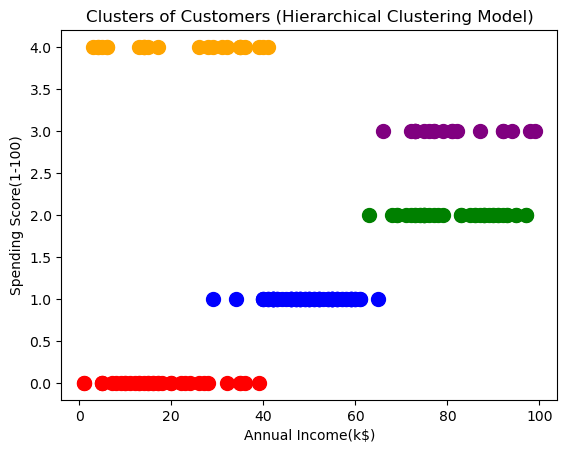

In [46]:
X = df2.iloc[:, [3,4]].values
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()